# EEG Data Preprocessing

## Converting Files to CSVs

In [7]:
import matplotlib.pyplot as plt
import mne
import pandas as pd
import numpy as np

In [ ]:


# Angi filstier direkte (tilpass disse til dine filer)
vhdr_file = "EEG test filer/Participant_MovementIntent000005.vhdr"  # Endre til din .vhdr-fil
output_csv = "EEG test filer/Participant_MovementIntent000005.csv"    # Ønsket lagringssti

def convert_brainvision_to_csv(vhdr_file, output_csv, annotation_window=0.005):
    """
    Leser en BrainVision-fil (.vhdr) og konverterer data til CSV med annotasjoner.
    Alle tilhørende filer (.eeg, .vmrk) lastes automatisk.
    """
    print(f"Laster data fra {vhdr_file} ...")
    raw = mne.io.read_raw_brainvision(vhdr_file, preload=True, verbose='ERROR')
    
    # Hent data og tidspunkter
    data, times = raw.get_data(return_times=True)
    df = pd.DataFrame(data.T, columns=raw.ch_names)
    df['time'] = times
    
    # Legg til en kolonne for annotasjoner dersom den ikke finnes
    if 'annotation' not in df.columns:
        df['annotation'] = ""
    
    # Sett inn annotasjoner fra raw.annotations
    for annot in raw.annotations:
        onset = annot['onset']
        duration = annot['duration']
        description = annot['description']
        start_idx = np.searchsorted(times, onset)
        end_idx = np.searchsorted(times, onset + duration)
        if end_idx == start_idx:
            end_idx = np.searchsorted(times, onset + annotation_window)
        df.loc[start_idx:end_idx, 'annotation'] = description
    
    df.to_csv(output_csv, index=False)
    print(f"Data lagret til {output_csv}")
    print("Annotasjoner funnet:")
    print(raw.annotations)
    return raw

# Kjør konverteringen
convert_brainvision_to_csv(vhdr_file, output_csv)


## Loading relevant CSV files to dataframe

In [2]:


# Definer en liste med CSV-filer med EEG-data (oppdater stinavnene til dine filer)
csv_files = [
    "EEG test filer/Participant_MovementIntent000005.csv"
]

# Liste for å lagre DataFrames fra hver fil
df_list = []

# Last inn hver CSV-fil og legg til i listen
for file in csv_files:
    try:
        df = pd.read_csv(file)
        df_list.append(df)
        print(f"Lastet {file} med {df.shape[0]} rader og {df.shape[1]} kolonner.")
    except Exception as e:
        print(f"Feil ved lasting av {file}: {e}")

# Kombiner alle DataFrames til én DataFrame
if df_list:
    combined_df = pd.concat(df_list, ignore_index=True)
    print("Kombinert DataFrame har", combined_df.shape[0], "rader og", combined_df.shape[1], "kolonner.")
    print(combined_df.head())
else:
    print("Ingen CSV-filer ble lastet.")


Lastet EEG test filer/Participant_MovementIntent000005.csv med 46740 rader og 38 kolonner.
Kombinert DataFrame har 46740 rader og 38 kolonner.
        Fp1        Fz        F3        F7       FT9       FC5       FC1  \
0 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   
1 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   
2 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   
3 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   
4 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333 -0.341333   

         C3        T7       TP9  ...       FC2        F4        F8       Fp2  \
0 -0.341333 -0.018392 -0.015152  ... -0.341333 -0.341333 -0.025168 -0.341333   
1 -0.341333 -0.018333 -0.015375  ... -0.341333 -0.341333 -0.024102 -0.341333   
2 -0.341333 -0.017888 -0.015402  ... -0.341333 -0.341333 -0.022145 -0.341333   
3 -0.341333 -0.017543 -0.015286  ... -0.341333 -0.341333 -0.020822 -0.341333   
4 -0.3

In [3]:
# Sjekk dimensjoner og kolonnenavn i den kombinerte DataFrame-en
print("Antall rader:", combined_df.shape[0])
print("Antall kolonner:", combined_df.shape[1])
print("\nKolonnenavn:")
print(combined_df.columns.tolist())

# Skriv ut de første 5 radene
combined_df.head()


Antall rader: 46740
Antall kolonner: 38

Kolonnenavn:
['Fp1', 'Fz', 'F3', 'F7', 'FT9', 'FC5', 'FC1', 'C3', 'T7', 'TP9', 'CP5', 'CP1', 'Pz', 'P3', 'P7', 'O1', 'Oz', 'O2', 'P4', 'P8', 'TP10', 'CP6', 'CP2', 'Cz', 'C4', 'T8', 'FT10', 'FC6', 'FC2', 'F4', 'F8', 'Fp2', 'Aux1', 'x_dir', 'y_dir', 'z_dir', 'time', 'annotation']


,Fp1,Fz,F3,F7,FT9,FC5,FC1,C3,T7,TP9,...,FC2,F4,F8,Fp2,Aux1,x_dir,y_dir,z_dir,time,annotation
0,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.018392,-0.015152,...,-0.341333,-0.341333,-0.025168,-0.341333,-3.359109,7.0,1041.0,252.0,0.000,New Segment/
1,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.018333,-0.015375,...,-0.341333,-0.341333,-0.024102,-0.341333,-4.180016,7.0,1041.0,252.0,0.002,New Segment/
2,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.017888,-0.015402,...,-0.341333,-0.341333,-0.022145,-0.341333,-4.217483,3.0,1043.0,249.0,0.004,NaN
3,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.017543,-0.015286,...,-0.341333,-0.341333,-0.020822,-0.341333,-4.170677,3.0,1043.0,249.0,0.006,NaN
4,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.341333,-0.017370,-0.015090,...,-0.341333,-0.341333,-0.020770,-0.341333,-3.684541,3.0,1043.0,249.0,0.008,NaN


Antall forekomster per annotasjon:
nan              46651
Comment/Yoooo       68
Comment/Halla       15
New Segment/         2
Comment/Hei          2
Comment/Hallo        2
Name: annotation, dtype: int64


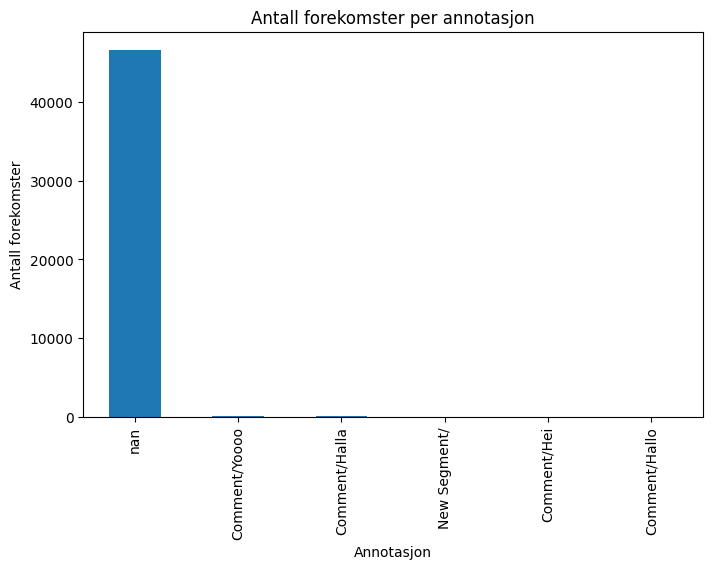

In [8]:


# Sørg for at annotasjonskolonnen er av typen string
combined_df['annotation'] = combined_df['annotation'].astype(str).str.strip()

# Filtrer ut tomme annotasjoner
annot_df = combined_df[combined_df['annotation'] != ""]

# Tell antall forekomster for hver annotasjon
annotation_counts = annot_df['annotation'].value_counts()
print("Antall forekomster per annotasjon:")
print(annotation_counts)

# Plot et stolpediagram
annotation_counts.plot(kind='bar', figsize=(8, 5), title="Antall forekomster per annotasjon")
plt.xlabel("Annotasjon")
plt.ylabel("Antall forekomster")
plt.show()


In [13]:
import numpy as np

# Først erstatter vi tomme strenger med NaN
combined_df['annotation'] = combined_df['annotation'].replace("", np.nan)

# Fyll fremover slik at hver annotasjon varer til neste annotasjon inntreffer
combined_df['annotation'] = combined_df['annotation'].ffill()

# For å se effekten, vis de første radene der annotasjonen endres
annotation_changes = combined_df[combined_df['annotation'].shift() != combined_df['annotation']]
print(annotation_changes[['time', 'annotation']].head(200))


         time     annotation
0       0.000   New Segment/
2       0.004            nan
2760    5.520    Comment/Hei
2762    5.524            nan
5280   10.560  Comment/Yoooo
...       ...            ...
44742  89.484            nan
44760  89.520  Comment/Yoooo
44762  89.524            nan
44780  89.560  Comment/Yoooo
44782  89.564            nan

[84 rows x 2 columns]
